In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

- UP = 0
- RIGHT = 1
- DOWN = 2
- LEFT = 3

In [3]:
class QLearningAlgorithm:
    def __init__(self, gym: gym.Env, learning_rate, gamma):
        self.gym = gym
        self.action_space = gym.action_space.n
        self.state_space = gym.observation_space.n
        self.Q = np.zeros((self.state_space, self.action_space))
        self.learning_rate = learning_rate # beta
        self.chance_for_best = 0.1  # epsilon
        self.gamma = gamma # gamma
        self.max_steps = 100

    def step(self, state, action, reward, next_state):
        current_value = self.Q[state, action]
        next_max = np.max(self.Q[next_state, :])
        new_value = current_value + self.learning_rate * (
            reward + self.gamma * next_max - current_value
        )
        self.Q[state, action] = new_value

    def chooseAction(self, state):
        if np.random.rand() < self.chance_for_best:
            return np.random.choice(self.action_space)
        else:
            current_best_move = np.argmax(self.Q[state, :])
            return current_best_move

    def runAlgorithm(self, num_episodes):
        total_reward = 0
        best_rewards_count = 0
        best_reward = float("-inf")

        for _ in range(num_episodes):
            state, _ = self.gym.reset()
            action = self.chooseAction(state)
            episode_reward = 0
            step = 0
            while step < self.max_steps:
                next_state, reward, done, _, _ = self.gym.step(action)
                self.step(state, action, reward, next_state)
                action = self.chooseAction(next_state)
                state = next_state
                episode_reward += reward
                step += 1
                if done:
                    if episode_reward > best_reward:
                        best_reward = episode_reward
                        best_rewards_count = 1
                    elif(episode_reward == best_reward):
                        best_rewards_count += 1
                    total_reward += episode_reward
                    break
            if step == self.max_steps:
                total_reward += -1500

        average_reward = total_reward / num_episodes
        best_reward = None if best_reward == float("-inf") else best_reward
        return average_reward, best_reward,best_rewards_count

In [4]:
num_episodes = 100
cliffWalker = QLearningAlgorithm(gym.make("CliffWalking-v0"), learning_rate=0.9, gamma=0.9)
average_reward, best_reward, best_rewards_count = cliffWalker.runAlgorithm(num_episodes)

print(f"In {num_episodes} episodes: average was: {average_reward} and best reward was: {best_reward}  Sum of best rewards: {best_rewards_count}")

In 100 episodes: average was: -132.16 and best reward was: -13  Sum of best rewards: 29


In [10]:
def draw_graphs():
    num_of_runs = 100
    num_episodes = 100
    learning_rates = np.linspace(0.1, 3, 30)
    gammas = np.linspace(0.1, 3, 30)
    fig1, (axs1) = plt.subplots(3, 1, figsize=(8, 16))
    fig2, (axs2) = plt.subplots(3, 1, figsize=(8, 16))

    average_rewards = []
    best_rewards = []
    best_rewards_counts = []
    for learning_rate in learning_rates:
        temp_average_rewards = []
        temp_best_rewards = []
        temp_best_rewards_counts = []
        for _ in range(num_of_runs):
            cliffWalker = QLearningAlgorithm(gym.make("CliffWalking-v0"), learning_rate=learning_rate, gamma=0.9)
            average_reward, best_reward,  best_rewards_count = cliffWalker.runAlgorithm(num_episodes)
            if(average_reward != None):
                temp_average_rewards.append(average_reward)
            if(best_reward != None):
                temp_best_rewards.append(best_reward)
            if(best_rewards_count != None):
                temp_best_rewards_counts.append(best_rewards_count)


        average_rewards.append(sum(temp_average_rewards) / num_of_runs)
        best_rewards.append(sum(temp_best_rewards) / num_of_runs)
        best_rewards_counts.append(sum(temp_best_rewards_counts) / num_of_runs)

    best_rewards = [None if x == None or x < -500 else x for x in best_rewards]

    axs1[0].plot(learning_rates, average_rewards, color="blue", marker="o",label="Average reward for different learning rates")
    axs1[0].set_title("Average reward for different learning rates")
    axs1[1].plot(learning_rates, best_rewards, color="red", marker="o", label="Best reward for different learning rates")
    axs1[1].set_title("Best reward for different learning rates")
    axs1[2].plot(learning_rates, best_rewards_counts, color="yellow", marker="o", label="Best rewards count for different learning rates")
    axs1[2].set_title("Best rewards count for different learning rates")

    average_rewards = []
    best_rewards = []
    best_rewards_counts = []
    for gamma in gammas:
        temp_average_rewards = []
        temp_best_rewards = []
        temp_best_rewards_counts = []
        for _ in range(num_of_runs):
            cliffWalker = QLearningAlgorithm(gym.make("CliffWalking-v0"), learning_rate=0.9, gamma=gamma)
            average_reward, best_reward,  best_rewards_count = cliffWalker.runAlgorithm(num_episodes)
            if(average_reward != None):
                temp_average_rewards.append(average_reward)
            if(best_reward != None):
                temp_best_rewards.append(best_reward)
            if(best_rewards_count != None):
                temp_best_rewards_counts.append(best_rewards_count)


        average_rewards.append(sum(temp_average_rewards) / num_of_runs)
        best_rewards.append(sum(temp_best_rewards) / num_of_runs)
        best_rewards_counts.append(sum(temp_best_rewards_counts) / num_of_runs)

    best_rewards = [None if x < -100 else x for x in best_rewards]

    axs2[0].plot(gammas, average_rewards, color="blue", marker="o", label="Average reward for different gammas")
    axs2[0].set_title("Average reward for different gammas")
    axs2[1].plot(gammas, best_rewards, color="red", marker="o",  label="Best reward for different gammas")
    axs2[1].set_title("Best reward for different gammas")
    axs2[2].plot(gammas, best_rewards_counts, color="yellow", marker="o", label="Best rewards count for different gammas")
    axs2[2].set_title("Best rewards count for different gammas")

    plt.show()


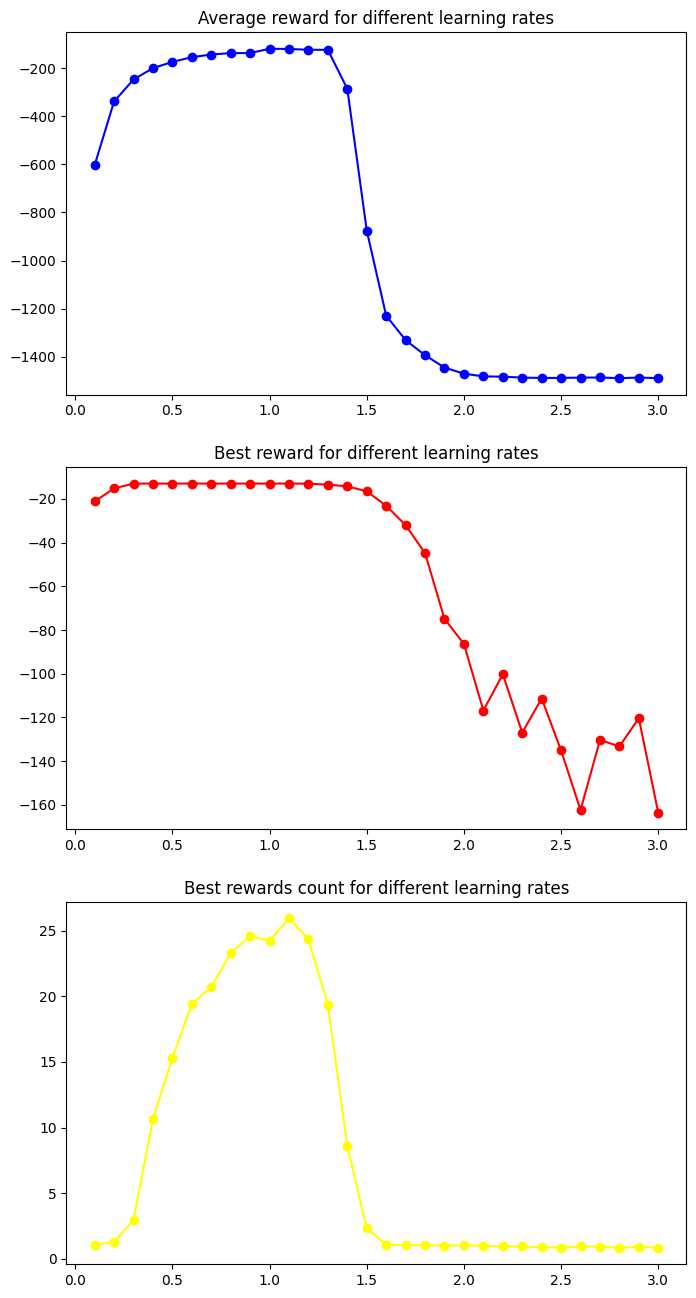

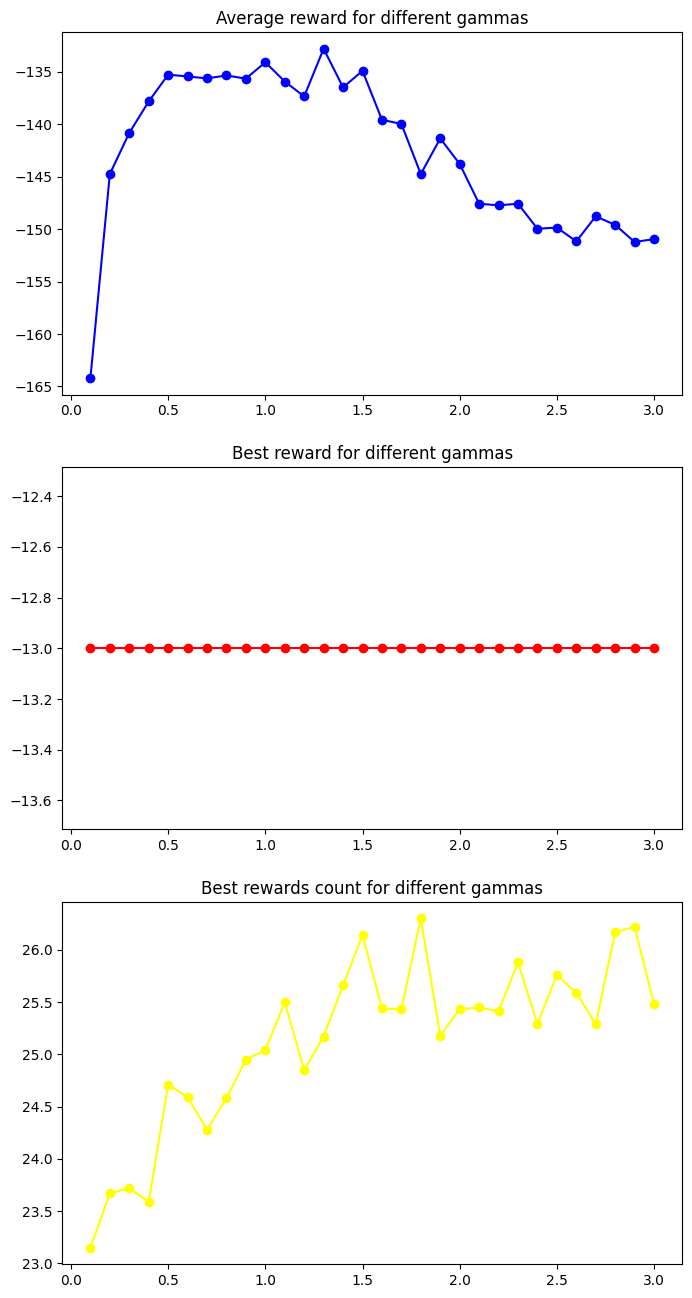

In [11]:
draw_graphs()

<h3>Best reward równy -13 oznacza najlepszą możliwą ścieżkę</h3>

<h3>Wpływ hiperparametrów na działanie algorytmu</h3>

- learning_rate (beta):
    - przy za małych wartościach (mniejsze niż około 0.3) uczy się za wolno i oceny stanów są zbyt małe, przez co nie jest w stanie wybrać najlepszej ścieżki wystarczająco szybko
    - przy za dużych wartościach (większe niż około 1.2) ocena kolejnej akcji za bardzo wpływa na ocenę stanu, przez co algorytm jeśli pójdzie w złą stronę to nie będzie chciał iść tą scieżką przy następnym przejściu nawet jeśli krok w inną stronę dałby mu lepszy wynik
    - optymalne wartości są od 0.5 do 1.1 co widać na podstawie ilości trafień w najlepszą wartość dla tych wartości beta

- gamma:
    - dla wszystkich wartości z przedziału znajdywana jest najlepsza ścieżka i to wiele razy, więc ten parametr nie ma tak dużego wpływu jak beta
    - najlepsze są wartości gammy z przedziału 0.3-1.2, ponieważ średnio najszybciej wtedy znajduje punkt końcowy, mimo, że dla większych wartości gamma częściej używana jest najlepsza ścieżka
    - dla dużych wartości gamma (większych niż 1.5) algorytm początkowo idzie gorszą ścieżką i częściej uderza w ścianę, ale po kilku iteracjach częściej wykorzystuje najlepszą ścieżkę